In [1]:
using ChaosCrypto
using PyPlot

In [2]:
function generarTaylor(condIni, funcion)
    funcion(condIni)
end

function generarTaylor(condIni, funcion, t)
    funcion(condIni, t)
end

generarTaylor (generic function with 2 methods)

In [3]:
function generarSerie(polTalor)
    x = Float64[]
    push!(x, polTalor.ini)
    valores = copy(polTalor.coef)
    for i in 1:length(valores)
        push!(x, valores[i]/i)
    end
    x
end

generarSerie (generic function with 1 method)

In [4]:
function generaIntervalo(lista)
    p = length(lista)
    h = lista[end]
    while (lista[p] == 0)
        p -= 1
        h = lista[p]
    end
    ϵ = 1e-3
    (ϵ/h)^(1/p)
end

generaIntervalo (generic function with 1 method)

In [5]:
function horner(x,h = 1e-3)
    p = length(x)
    xt = zeros(x)
    xt[p-1] = x[p-1] + h*x[p]
    for i in 3:p
        xt[p-i+1] = x[p-i+1] + h*xt[p-i+1+1]
    end
    xt[1]
end

horner (generic function with 2 methods)

In [6]:
σ = 10
ρ = 60
β = 8/3

function lorenz(xx, t)
    x, y, z, xr, yr, zr= xx
    AD.Taylor(x, [σ])*(AD.Taylor(x,[y])-AD.Taylor(x,[x])),
    AD.Taylor(y,[x])*(AD.Taylor(y,[ρ])-AD.Taylor(y,[z]))-AD.Taylor(y,[y]),
    AD.Taylor(z,[x])*AD.Taylor(z,[y])-AD.Taylor(z,[β])*AD.Taylor(z,[z]),
    AD.Taylor(xr,[σ])*(AD.Taylor(xr,[y])-AD.Taylor(xr,[xr])),
    AD.Taylor(yr,[ρ])*AD.Taylor(yr,[xr])-AD.Taylor(yr,[yr])-AD.Taylor(yr,[xr])*AD.Taylor(yr,[zr]),
    AD.Taylor(zr,[xr])*AD.Taylor(zr,[yr])-AD.Taylor(zr,[β])*AD.Taylor(zr,[zr])
end

lorenz (generic function with 1 method)

In [7]:
function osc(x0)
    x = AD.Taylor(x0[1],[x0[2]])
    y = AD.Taylor(x0[2],[-2])*AD.Taylor(x0[2],[x0[1]])
    z = AD.Taylor(x0[3]),
    xr =
    yr =
    zr = 
    x,y,z,xr,yr,zr
end

LoadError: LoadError: syntax: invalid assignment location
while loading In[7], in expression starting on line 9

In [8]:
function integrador(x0, f, tf)
    a = generarTaylor(x0,f)
    b = map(generarSerie,a)
    suma = map(horner,b)
    sol = Array{Float64,1}[x0, [suma...]]
    t = [0.,1e-3]
    while t[end] < tf
        a = generarTaylor(sol[end],f)
        b = map(generarSerie,a)
        suma = map(horner,b)
        push!(sol,[suma...])
        push!(t,t[end]+1e-3)
    end
    sol,t
end

integrador (generic function with 1 method)

In [9]:
vecs,t = integrador([1.,1.,1.,1.,100.,100.],lorenz,10.)

LoadError: LoadError: MethodError: `lorenz` has no method matching lorenz(::Array{Float64,1})
Closest candidates are:
  lorenz(::Any, !Matched::Any)
while loading In[9], in expression starting on line 1

In [10]:
plot(t, [x[1] for x in vecs], label="Lorenz")
plot(t, [x[4] for x in vecs], label="yr")
legend()

LoadError: LoadError: UndefVarError: vecs not defined
while loading In[10], in expression starting on line 1

In [11]:
plot(t, [x[2] for x in vecs], label="Lorenz")
plot(t, [x[5] for x in vecs], label="yr")
legend()

LoadError: LoadError: UndefVarError: vecs not defined
while loading In[11], in expression starting on line 1

In [12]:
plot(t, [x[3] for x in vecs], label="Lorenz")
plot(t, [x[6] for x in vecs], label="yr")
legend()

LoadError: LoadError: UndefVarError: vecs not defined
while loading In[12], in expression starting on line 1

In [13]:
function runge2(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+2dt*k1/3, t+2*dt/3)
    (k1/4+3k2/4)
end

function runge4(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+dt*k1/2, t+dt/2)
    k3 = f(x+dt*k2/2,t+dt/2)
    k4 = f(x+dt*k3,t + dt)
    (k1+2k2+2k3+k4)/6
end

function superrunge(f,x,t,dt)
    x1x,u1x,x1y,u1y,x2x,u2x,x2y,u2y = x
    normi = ((x1x-x2x)^2+(x1y-x2y)^2)^(-3/2)
    if normi < 1e-3
        return "fin"
    else
        k1 = f(x,t)
        k2 = f(x+dt*k1/2, t+dt/2)
        k3 = f(x+dt*k2/2,t+dt/2)
        k4 = f(x+dt*k3,t + dt)
        (k1+2k2+2k3+k4)/6
    end
end

function integrar(f, x0, t0, t_final, dt, metodo = 4)
    # necesito una function f(x,t)
    # que come un vector x, el tiempo t
    # y regresa un vector (el campo vectorial evaluado en x,t)
    
    tiempos = [t0]
    xs = typeof(x0)[x0]

    #x = copy(x0)  # ver pythontutor.com
    
    x = x0
    
    for t in t0:dt:t_final
        if metodo == 1
            k = f(x,t)
        elseif metodo == 2
            k = runge2(f,x,t,dt)
        elseif metodo == 4
            k = runge4(f,x,t,dt)
        elseif metodo == 20
            k = superrunge(f,x,t,dt)
            if k == "fin"
                return xs, tiempos
            end
        else
            error("Los únicos métodos son 1 2 ó 4")
        end
        x_nueva = x + dt*k
        
        push!(xs, x)
        push!(tiempos, t)
        
        x = x_nueva
        
    end
    
    xs, tiempos
end

integrar (generic function with 2 methods)

In [14]:
fig = figure()

@manipulate for σ in 0:.1:50, β in 0:.1:50, ρ in 0:.1:50
    withfig(fig) do
        function lorentz(xx,t)
            x,y,z = xx
            [σ*(y-x), x*(ρ-z)-y, x*y-β*z]
        end
        xs, ts = integrar(lorentz,[1., 1., 1.],0. ,20.1 ,1e-3,4)
        plot3D([x[1] for x in xs],[x[2] for x in xs],[x[3] for x in xs],label="Lorenz")
        legend()
    end
end

LoadError: LoadError: UndefVarError: @manipulate not defined
while loading In[14], in expression starting on line 13

In [15]:
σ = 10
ρ = 60
β = 8/3

function lorenz(xx,t)
    x, y, z, xr, yr, zr = xx
    [σ*(y-x), x*(ρ-z)-y, x*y-β*z, σ*(y-xr), (ρ*xr-yr-xr*zr), (xr*yr-β*zr)]
end

xs, ts = integrar(lorenz,[1., 1., 1., 1., 100, 100],0. ,10. ,1e-3,4)

([[1.0,1.0,1.0,1.0,100.0,100.0],[1.0,1.0,1.0,1.0,100.0,100.0],[1.000288956351818,1.0579775186819051,0.9983646203871539,1.000288956351818,99.86014938604401,99.83349509403479],[1.0011517840606747,1.1159326863958128,0.9967921164530711,1.0011517840606747,99.72058192041473,99.66735152273795],[1.0025827185285459,1.1738991359527675,0.9952830348064678,1.0025827185285459,99.58127453228211,99.5016252549642],[1.0045763853539194,1.231910139929975,0.9938380465645921,1.0045763853539194,99.44220462038028,99.33637129662063],[1.0071277929787703,1.2899986334474847,0.9924579461536236,1.0071277929787703,99.30335003280517,99.17164373586006],[1.010232325633097,1.3481972364992933,0.9911436504182564,1.010232325633097,99.16468904711395,99.00749578701725],[1.0138857365697038,1.4065382758549727,0.9898961980316839,1.0138857365697038,99.02620035071838,98.8439798333335],[1.0180841415821507,1.4650538065475114,0.988716749198085,1.0180841415821507,98.88786302156323,98.68114746851363]  …  [15.814487739656984,22.0859911

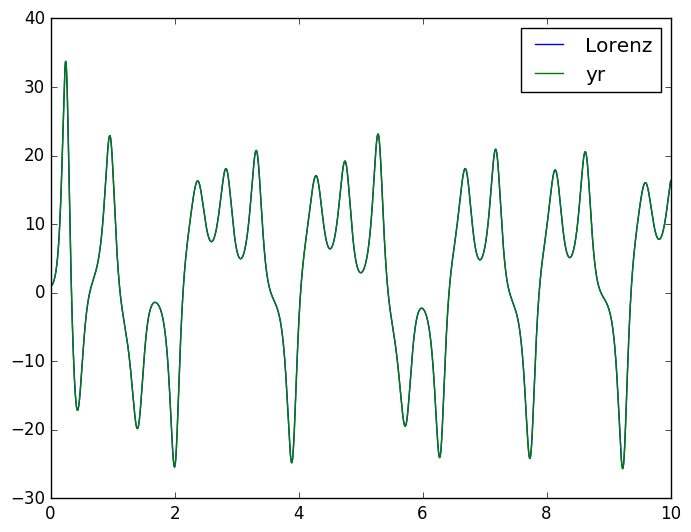

PyObject <matplotlib.legend.Legend object at 0x7f5b39a16b70>

In [16]:
plot(ts, [x[1] for x in xs], label="Lorenz")
plot(ts, [x[4] for x in xs], label="yr")
legend()

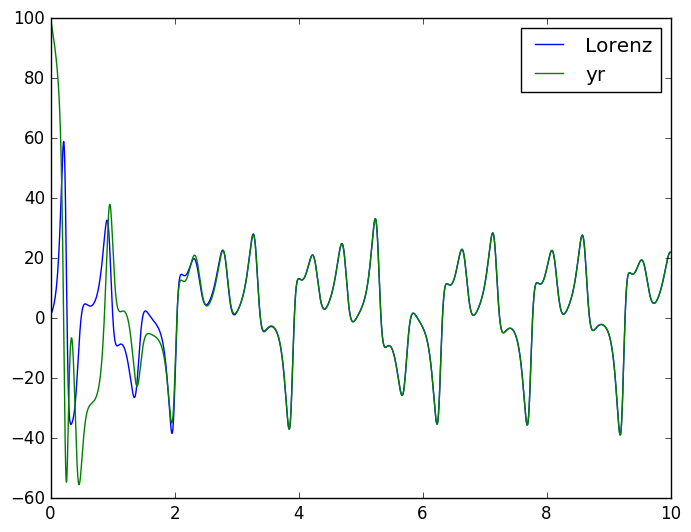

PyObject <matplotlib.legend.Legend object at 0x7f5b39703cc0>

In [17]:
plot(ts, [x[2] for x in xs], label="Lorenz")
plot(ts, [x[5] for x in xs], label="yr")
legend()

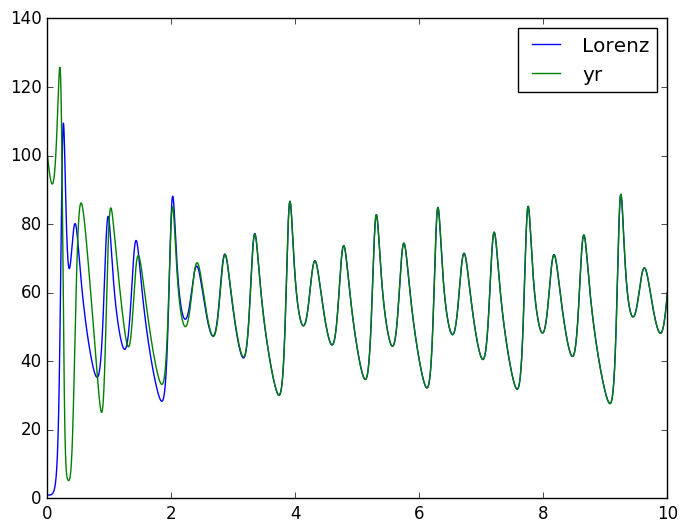

PyObject <matplotlib.legend.Legend object at 0x7f5b39acbdd8>

In [18]:
plot(ts, [x[3] for x in xs], label="Lorenz")
plot(ts, [x[6] for x in xs], label="yr")
legend()

In [19]:
plot3D([x[1] for x in vecs],[x[2] for x in vecs],[x[3] for x in vecs])
legend()

LoadError: LoadError: UndefVarError: vecs not defined
while loading In[19], in expression starting on line 1

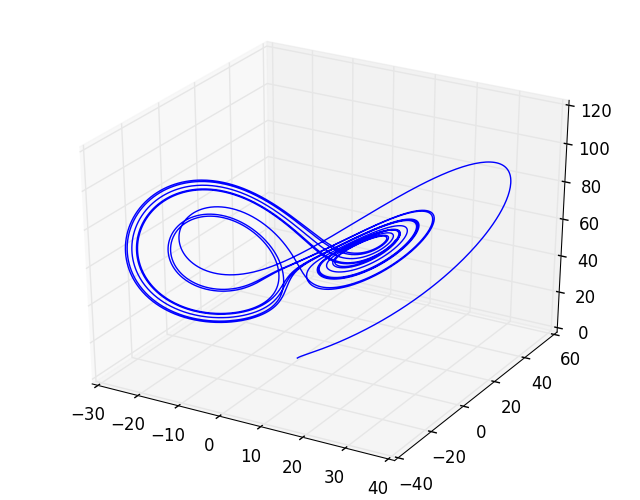

In [20]:
plot3D([x[1] for x in xs],[x[2] for x in xs],[x[3] for x in xs])
legend()

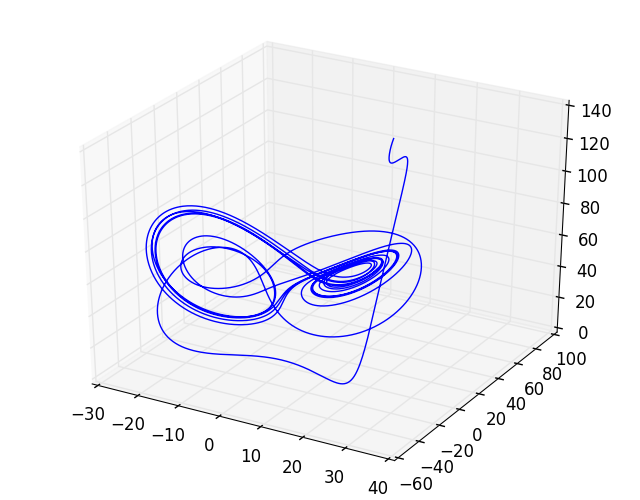

In [21]:
plot3D([x[4] for x in xs],[x[5] for x in xs],[x[6] for x in xs])
legend()

In [22]:
σ = 10
ρ = 60
β = 8/3

function lorenz4(xx,t)
    x, y, z, xr, yr, zr = xx
    [σ*(y-x), x*(ρ-z)-y, x*y-β*z, σ*(yr-xr), (ρ*xr-yr-xr*z), (x*y-β*z)]
end

xs4, ts4 = integrar(lorenz4,[1., 1., 1., 100, 100, 1.],0. ,10. ,1e-3,4)

([[1.0,1.0,1.0,100.0,100.0,1.0],[1.0,1.0,1.0,100.0,100.0,1.0],[1.000288956351818,1.0579775186819051,0.9983646203871539,100.0288956351818,105.79775186819052,0.9983646203871539],[1.0011517840606747,1.1159326863958128,0.9967921164530711,100.11517840606747,111.5932686395813,0.9967921164530711],[1.0025827185285459,1.1738991359527675,0.9952830348064678,100.25827185285458,117.38991359527677,0.9952830348064678],[1.0045763853539194,1.231910139929975,0.9938380465645921,100.45763853539192,123.19101399299751,0.9938380465645921],[1.0071277929787703,1.2899986334474847,0.9924579461536236,100.71277929787702,128.99986334474846,0.9924579461536236],[1.010232325633097,1.3481972364992933,0.9911436504182564,101.02323256330968,134.81972364992933,0.9911436504182564],[1.0138857365697038,1.4065382758549727,0.9898961980316839,101.38857365697035,140.65382758549725,0.9898961980316839],[1.0180841415821507,1.4650538065475114,0.988716749198085,101.80841415821504,146.50538065475112,0.988716749198085]  …  [15.814487739

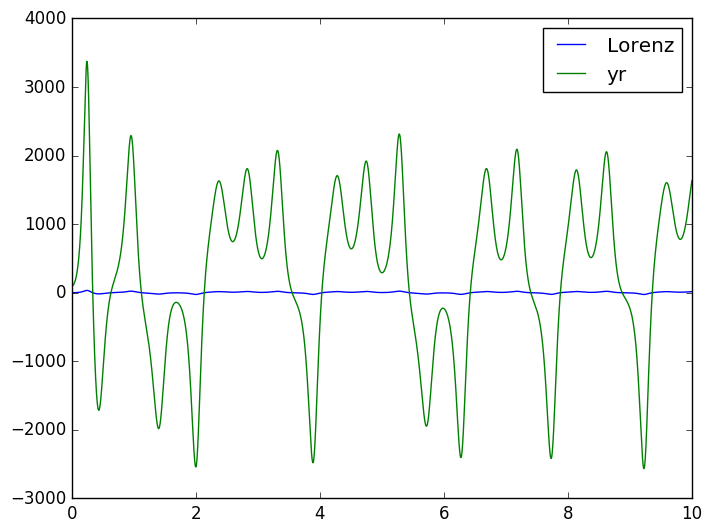

PyObject <matplotlib.legend.Legend object at 0x7f5b370272b0>

In [23]:
plot(ts4, [x[1] for x in xs4], label="Lorenz")
plot(ts4, [x[4] for x in xs4], label="yr")
legend()

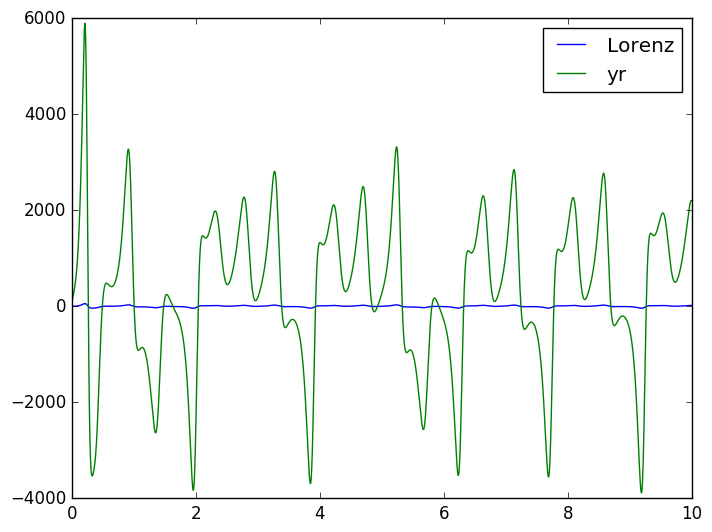

PyObject <matplotlib.legend.Legend object at 0x7f5b371d8828>

In [24]:
plot(ts4, [x[2] for x in xs4], label="Lorenz")
plot(ts4, [x[5] for x in xs4], label="yr")
legend()

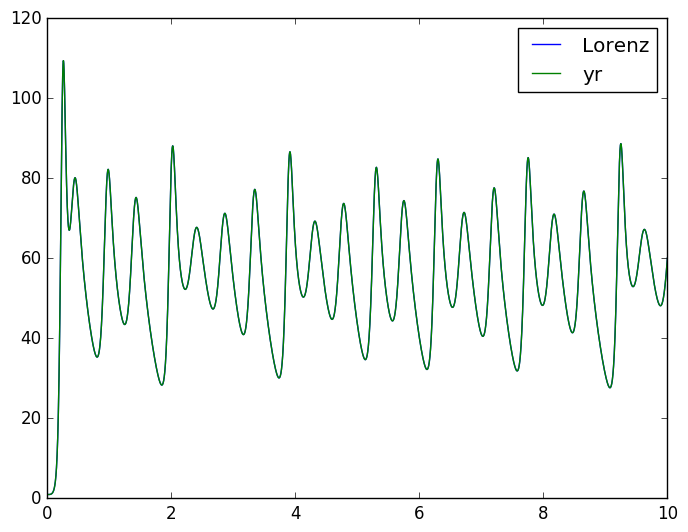

PyObject <matplotlib.legend.Legend object at 0x7f5b36a43400>

In [25]:
plot(ts, [x[3] for x in xs4], label="Lorenz")
plot(ts, [x[6] for x in xs4], label="yr")
legend()

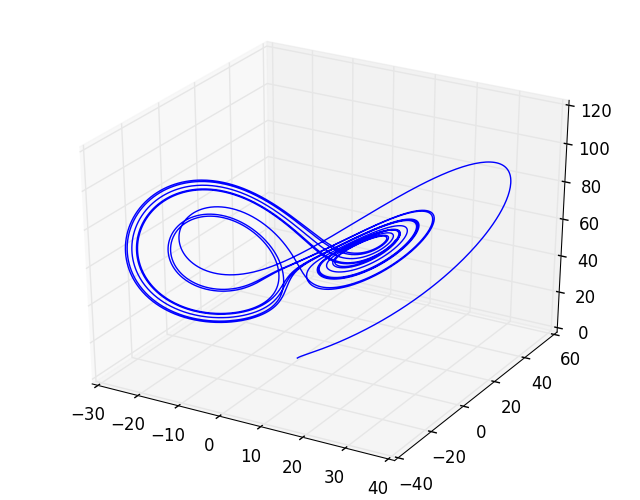

In [26]:
plot3D([x[1] for x in xs4],[x[2] for x in xs4],[x[3] for x in xs4])
legend()

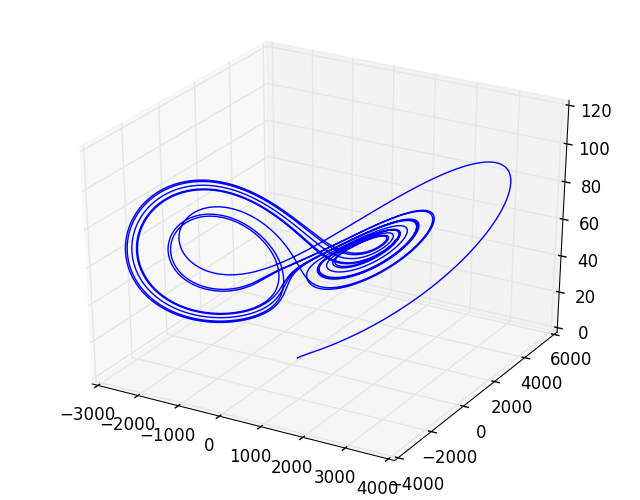

In [27]:
plot3D([x[4] for x in xs4],[x[5] for x in xs4],[x[6] for x in xs4])
legend()

In [28]:
σ = 10
ρ = 60
β = 8/3

function lorenz45(xx,t)
    x, y, z, xr, yr, zr = xx
    [σ*(y-x),   (ρ*x-y-x*z),     x*y-β*z, 
     σ*(yr-xr), (ρ*x-y-x*z),    (xr*yr-β*zr)]
end

xs45, ts45 = integrar(lorenz45,[1., 1., 1., 100, 1., 100],0. ,10. ,1e-3,4)

([[1.0,1.0,1.0,100.0,1.0,100.0],[1.0,1.0,1.0,100.0,1.0,100.0],[1.000288956351818,1.0579775186819051,0.9983646203871539,99.01522249760181,1.0579775186819051,99.83594012118333],[1.0011517840606747,1.1159326863958128,0.9967921164530711,98.04082044159253,1.1159326863958128,99.67701391646712],[1.0025827185285459,1.1738991359527675,0.9952830348064678,97.07669054007305,1.1738991359527675,99.52310557133578],[1.0045763853539194,1.231910139929975,0.9938380465645921,96.12273086175362,1.231910139929975,99.37410449213333],[1.0071277929787703,1.2899986334474847,0.9924579461536236,95.17884081894512,1.2899986334474847,99.22990510964863],[1.010232325633097,1.3481972364992933,0.9911436504182564,94.2449211509438,1.3481972364992933,99.09040669071418],[1.0138857365697038,1.4065382758549727,0.9898961980316839,93.32087390780154,1.4065382758549727,98.95551315750743],[1.0180841415821507,1.4650538065475114,0.988716749198085,92.40660243447344,1.4650538065475114,98.82513291425641]  …  [15.814487742880663,22.08599

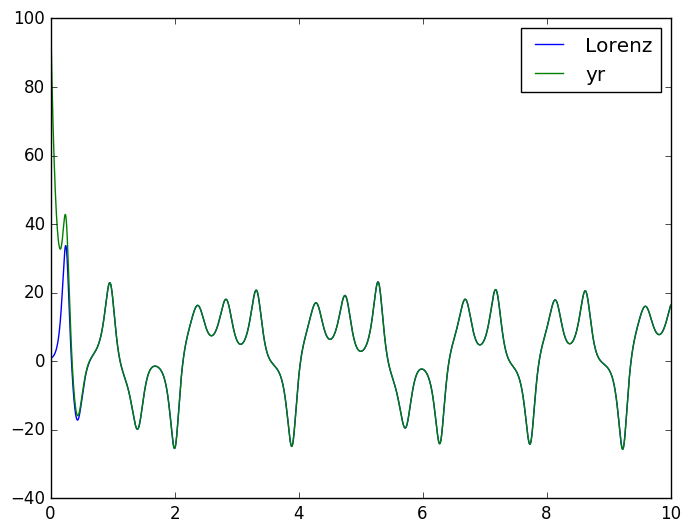

PyObject <matplotlib.legend.Legend object at 0x7f5b3703a5f8>

In [29]:
plot(ts45, [x[1] for x in xs45], label="Lorenz")
plot(ts45, [x[4] for x in xs45], label="yr")
legend()

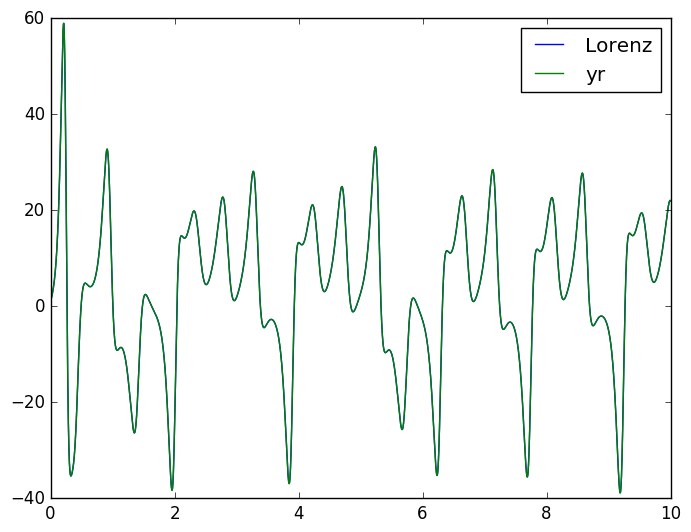

PyObject <matplotlib.legend.Legend object at 0x7f5b36a2bf28>

In [30]:
plot(ts45, [x[2] for x in xs45], label="Lorenz")
plot(ts45, [x[5] for x in xs45], label="yr")
legend()

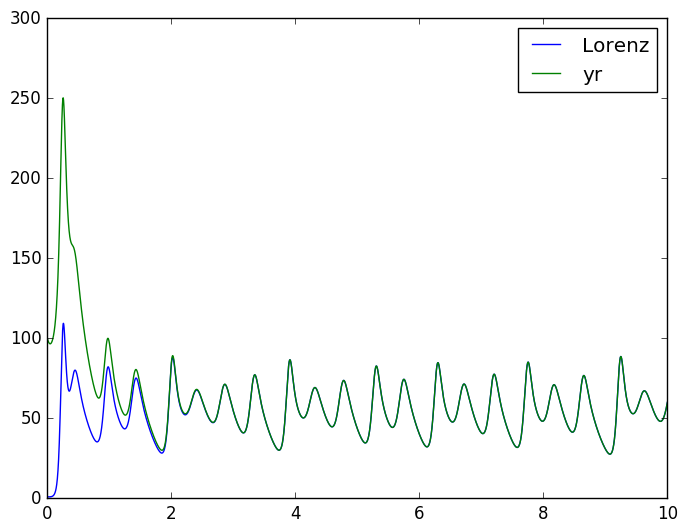

PyObject <matplotlib.legend.Legend object at 0x7f5b369a92e8>

In [31]:
plot(ts45, [x[3] for x in xs45], label="Lorenz")
plot(ts45, [x[6] for x in xs45], label="yr")
legend()

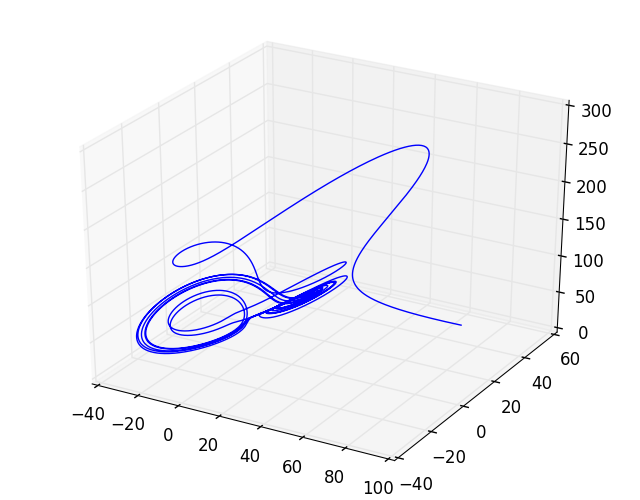

In [32]:
plot3D([x[4] for x in xs45],[x[5] for x in xs45],[x[6] for x in xs45])
legend()

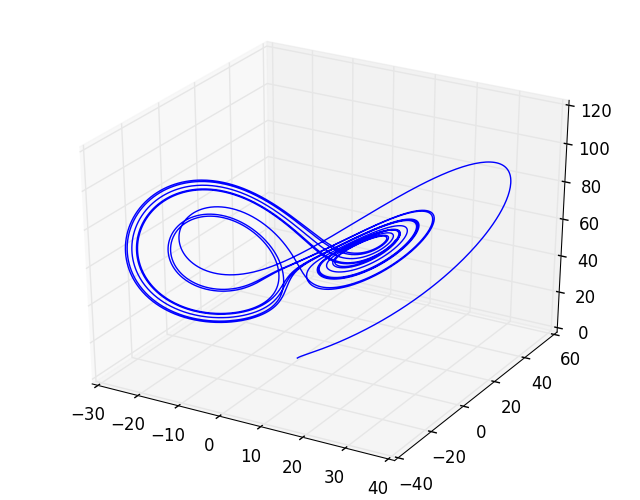

In [33]:
plot3D([x[1] for x in xs45],[x[2] for x in xs45],[x[3] for x in xs45])
legend()